In [1]:
import os

curr_folder = os.getcwd() + "/"
datasets_folder = curr_folder[:-6] + "Datasets/"
stats_results_folder = curr_folder + "Results/"
print(datasets_folder)
print(stats_results_folder)

/home/ipsilva/Repositories/dynamic-projections/Datasets/
/home/ipsilva/Repositories/dynamic-projections/Stats/Results/


In [2]:
datasets_subfolders = []
for i in os.walk(datasets_folder):
    datasets_subfolders.append(i[0])

datasets_subfolders = datasets_subfolders[1:]
datasets_subfolders

['/home/ipsilva/Repositories/dynamic-projections/Datasets/gaussians',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/quickdraw',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/sorts',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/walk',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/nnset',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/fashion',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/cifar10cnn',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/esc50',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/qtables',
 '/home/ipsilva/Repositories/dynamic-projections/Datasets/cartolastd']

In [3]:
dataset_number = 3
selected_dataset = datasets_subfolders[dataset_number]
selected_dataset

'/home/ipsilva/Repositories/dynamic-projections/Datasets/walk'

In [4]:
from os import listdir
from os.path import isfile, join

files = [f for f in listdir(selected_dataset) if isfile(join(selected_dataset, f))]
files[:5]

['walk-32.csv', 'walk-9.csv', 'walk-13.csv', 'walk-40.csv', 'walk-4.csv']

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame()

obs_per_timestep = []
for file in files:
    file_loc = selected_dataset + "/" + file
    ndf = pd.read_csv(file_loc)
    df = df.append(ndf)
    obs_per_timestep.append(ndf.shape[0])
    
median_obs_per_timestep = np.median(obs_per_timestep)
dev_obs_per_timestep = np.std(obs_per_timestep)

df = df.drop(columns=df.columns[0], axis=1)
print(df.shape, df.head())

(15000, 100)          f0        f1        f2        f3        f4        f5        f6  \
0  0.720912  0.479067  0.437060  0.648702  0.630972  0.726174  0.601943   
1  0.421922  0.561064  0.372445  0.333939  0.418129  0.315303  0.467605   
2  0.546639  0.253494  0.532652  0.647772  0.691843  0.387863  0.571033   
3  0.244943  0.546189  0.777406  0.570489  0.268278  0.535666  0.504847   
4  0.198149  0.583883  0.459803  0.437561  0.594751  0.664160  0.751011   

         f7        f8        f9  ...       f90       f91       f92       f93  \
0  0.332192  0.637675  0.299020  ...  0.520356  0.332268  0.526429  0.564325   
1  0.342318  0.354389  0.452754  ...  0.457031  0.690341  0.244814  0.356854   
2  0.483193  0.526940  0.665484  ...  0.274776  0.640374  0.767704  0.549041   
3  0.616460  0.441160  0.517919  ...  0.768270  0.567163  0.267984  0.267748   
4  0.054837  0.456378  0.429461  ...  0.330103  0.332421  0.423307  0.648107   

        f94       f95       f96       f97       f98    

In [6]:
from sklearn.decomposition import PCA

def intrisic_dim(dataframe, target_variance):
    pca = PCA()

    principalComponents = pca.fit_transform(df)

    list_variance = pca.explained_variance_ratio_
    final_var = 0
    dims = 0
    for var in list_variance:
        final_var += var
        dims += 1
        if final_var > target_variance:
            break
    return dims, final_var, principalComponents[:dims]

In [7]:
target_variance = 0.9

(dims, final_var, components) = intrisic_dim(df, target_variance)

print("Total time-steps:", len(obs_per_timestep))
print("Registers per time-step (median):", median_obs_per_timestep)
print("Registers per time-step (deviation):", dev_obs_per_timestep)
print("Total dimensions:", df.shape[1])
print("Intrinsic dimensions:", dims)
print("Total variance:", final_var)

Total time-steps: 50
Registers per time-step (median): 300.0
Registers per time-step (deviation): 0.0
Total dimensions: 100
Intrinsic dimensions: 30
Total variance: 0.902423473071131


In [8]:
fig_name = selected_dataset.split('/')[-1]

In [9]:
import matplotlib.pyplot as plt

# identifying distributions
hists_ax = df.hist(bins=20, grid=False, figsize=(10,10), density=True)

for arr in hists_ax:
    for ax in arr:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
plt.suptitle(fig_name + " attribute's absolute distributions", fontsize=15, weight='roman')
plt.tight_layout()
plt.subplots_adjust(top=0.925)
plt.savefig(stats_results_folder+"attribute_histograms/"+fig_name+"_attr_dist")

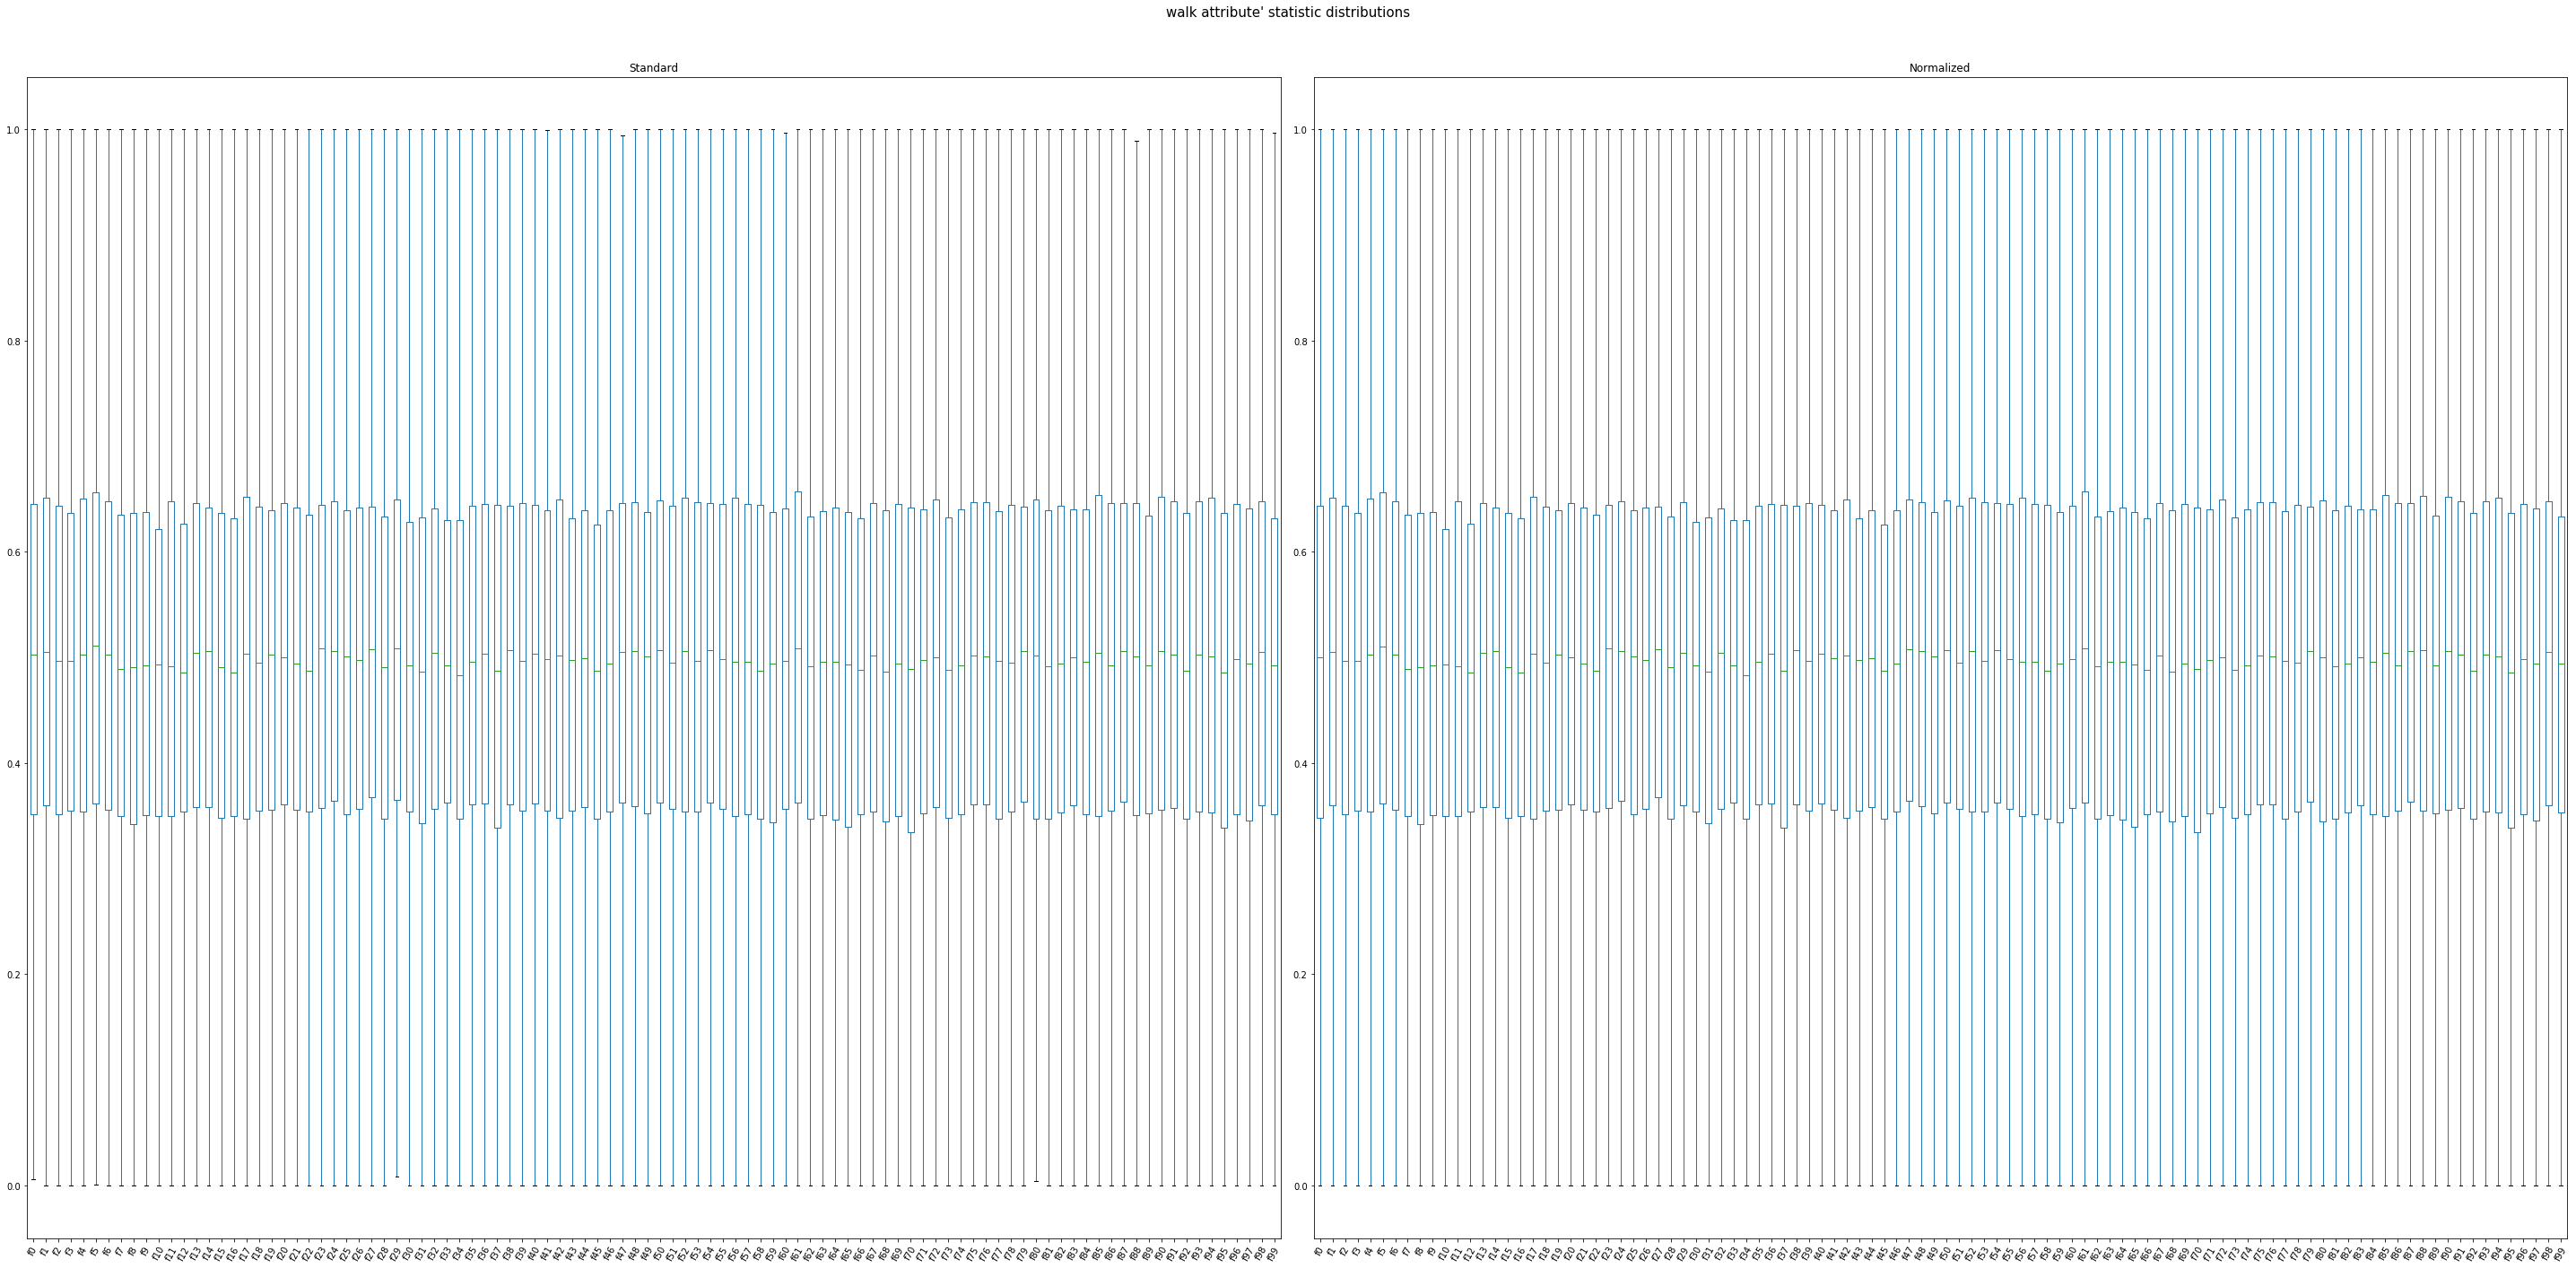

In [10]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40,20))

ax_box = df.plot.box(ax=axes[0])
ax_box.set_xticklabels(ax_box.get_xticklabels(), rotation=60);
ax_box.set_title("Standard")

min_max_scaler = MinMaxScaler()
ax_norm_box = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df)), columns=df.columns).plot.box(ax=axes[1])
ax_norm_box.set_xticklabels(ax_norm_box.get_xticklabels(), rotation=60);
ax_norm_box.set_title("Normalized");

plt.suptitle(fig_name + " attribute' statistic distributions", fontsize=15, weight='roman')
plt.tight_layout()
plt.subplots_adjust(top=0.925)

plt.savefig(stats_results_folder+"attribute_boxplots/"+fig_name+"_attr_statdist")